# NLP With Hotel Review Part 1
By: Meliana Poniman

For this project, we are going to look at the hotel review located in Europe, perform EDA and find out what words are used the most in positive and negative words. The dataset can be found from [kaggle](https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe).

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## Exploratory Data Analysis

In [22]:
# Load data
data = pd.read_csv('Hotel_Reviews.csv')

In [4]:
# Looking at the data
data.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [4]:
# shape of data
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')

There are 515738 rows and 17 columns.


In [29]:
# Check data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

The columns consist of some numeric and non-numeric columns.

| Numeric Columns                               |  Non-Numeric Columns          |
| ----------------------------------------------|-------------------------------|
| Additional_Number_of_Scoring                  | Hotel_Address                 |
| Average_Score                                 | Review_Date                   |
| Review_Total_Negative_Word_Counts             | Hotel_Name                    |
| Total_Number_of_Reviews                       | Reviewer_Nationality          |
| Review_Total_Positive_Word_Counts             | Negative_Review               |
| Total_Number_of_Reviews_Reviewer_Has_Given    | Positive_Review               |   
| Reviewer_Score                                | Tags                          |
| lat                                           | days_since_review             |
| lng                                           |                               |

* There is some Nan value in the data in lat and lng columns.
* Review Date can be changed into datetime and we can take only the year as a numerical column. 
* Days since review can be changed into numeric column by omiting the word days and change the Dtype into int.

The description of the columns can be found on [kaggle](https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe). Our target is Reviewer_Score.

In [6]:
# Check duplicates
print(f'There are {data.duplicated().sum()} duplicates.')

There are 526 duplicates.


In [108]:
# Drop duplicated
data.drop_duplicates(inplace=True)

In [8]:
# Check
data.duplicated().sum() #There is no more duplicates data

0

In [4]:
# Check nan value
data.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

There are 3268 value of latitude and longitude. Possibly, they are in the same row.

In [49]:
# Check if the same row has both NaN value for lat and lng.
data[data['lat'].isna()].head(2)    # They are in the same row.

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
99488,20 Rue De La Ga t 14th arr 75014 Paris France,22,8/3/2017,7.8,Mercure Paris Gare Montparnasse,Australia,No Negative,0,377,Upgraded rooms are excellent Good size for tr...,25,6,10.0,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN
99489,20 Rue De La Ga t 14th arr 75014 Paris France,22,8/3/2017,7.8,Mercure Paris Gare Montparnasse,United Kingdom,Noise Not being told about this when we check...,12,377,The location was great However renovations we...,45,1,6.7,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN


In [61]:
# Hotel name which has the null value
data[data['lat'].isna()].Hotel_Name.unique()

array(['Mercure Paris Gare Montparnasse', 'Holiday Inn Paris Montmartre',
       'Maison Albar Hotel Paris Op ra Diamond',
       'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
       'Hotel Park Villa', 'Fleming s Selection Hotel Wien City',
       'Cordial Theaterhotel Wien', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Renaissance Barcelona Hotel',
       'Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Hotel Advance', 'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'Hotel Pension Baron am Schottentor',
       'Hotel Atlanta'], dtype=object)

In [62]:
# taking the country only
data['Hotel_Address'].str.rpartition()

,0,1,2
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam,,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam,,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam,,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam,,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam,,Netherlands
...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,,Austria
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,,Austria
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,,Austria
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,,Austria


In [109]:
# making a column with only country
data['Hotel_Country'] = data['Hotel_Address'].str.rpartition()[2]

In [10]:
# Find which country has the Nan Value
data[data['lat'].isna()].Hotel_Country.unique()

array(['France', 'Spain', 'Austria'], dtype=object)

So, there are 3 countries that have null value at the latitude and longitude. I am going to choose one latitude and one longitude from the same country for the null value.

In [11]:
# looking the lat and lon for Austria, France and Spain
# Austria: 48.226406 and 16.360063
# France: 48.874348 and 2.289733
# Spain: 41.388223 and 2.164455
data[data['Hotel_Country'] == 'Spain'].head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
117428,234 Diputacio Eixample 08007 Barcelona Spain,27,7/2/2017,7.8,Sansi Diputacio,United States of America,First room the air conditioner wasn t working...,60,338,Restaurant across the street opens at 6am and...,27,1,6.3,"[' Leisure trip ', ' Couple ', ' Double Room '...",32 days,41.388223,2.164455,Spain
117429,234 Diputacio Eixample 08007 Barcelona Spain,27,4/14/2017,7.8,Sansi Diputacio,Israel,No Negative,0,338,The value for money was the greatest I ve see...,54,14,9.6,"[' Leisure trip ', ' Couple ', ' Double Room '...",111 day,41.388223,2.164455,Spain


In [110]:
# Change the lat and lng
data.loc[data['Hotel_Country'] == 'Austria'] = data[data['Hotel_Country'] == 'Austria'].fillna(value = {'lat' : 48.226406, 'lng' : 16.360063 })
data.loc[data['Hotel_Country'] == 'France'] = data[data['Hotel_Country'] == 'France'].fillna(value = {'lat' : 48.874348, 'lng' : 2.289733 })
data.loc[data['Hotel_Country'] == 'Spain'] = data[data['Hotel_Country'] == 'Spain'].fillna(value = {'lat' : 41.388223, 'lng' : 2.164455 })

In [111]:
# check null value
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515212 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        515212 non-null  object 
 6   Negative_Review                             515212 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515212 non-null  object 
 

In [14]:
# Target columns is Reviewer_Score
# What is in it?
data.Reviewer_Score.value_counts().sort_index()

2.5       2192
2.9       1583
3.0         37
3.1          8
3.3       2765
3.5         79
3.8       4035
4.0         84
4.2       5089
4.4         12
4.5        122
4.6       6226
5.0       8408
5.4       9518
5.5        227
5.6         17
5.8      12014
6.0        253
6.3      14909
6.5        345
6.7      18765
6.9         29
7.0        410
7.1      24837
7.5      34831
7.9      33062
8.0        505
8.1         39
8.3      41090
8.5        508
8.8      46386
9.0        646
9.2      58526
9.4         63
9.5        724
9.6      71110
10.0    115758
Name: Reviewer_Score, dtype: int64

In [112]:
# Convert Reviewer_Score into integers
data['Reviewer_Score'] = round(data['Reviewer_Score']).astype(int)
data['Reviewer_Score']

0         3
1         8
2         7
3         4
4         7
         ..
515733    7
515734    6
515735    2
515736    9
515737    8
Name: Reviewer_Score, Length: 515212, dtype: int64

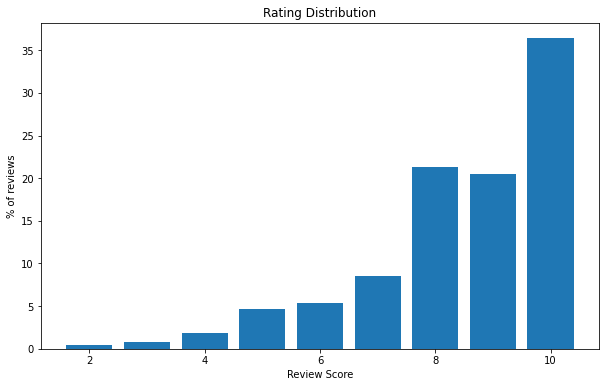

In [8]:
# plotting the distribution of Reviewer_Score 
values, counts = np.unique(data['Reviewer_Score'], return_counts=True)
normalized_counts = counts / counts.sum()

plt.figure(figsize=(10,6))
plt.bar(values, normalized_counts * 100)
plt.xlabel('Review Score')
plt.ylabel('% of reviews')
plt.title('Rating Distribution')
plt.show()

After plotting the data, it is left-skewed with the highest count is when the review_score is 10. It seems that majority of visitors like the hotel and leave a high reviewer score. This distribution can be a problem for classification problem because you have more data at one class compare to the other. It can lead to bad model since it has more data at one class compare to the other classes so it can be biased toward the class with bigger sampling data.

In [113]:
# Convert Reviewer_Score into binary column
# Score of 9 and 10 will be 1
# Score of 0-8 will be 0
data['Reviewer_Score'] = np.where(data['Reviewer_Score'] >=9, 1, 0)
data.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands


In [114]:
# checking the amount of binary columns
data['Reviewer_Score'].value_counts()

1    293213
0    221999
Name: Reviewer_Score, dtype: int64

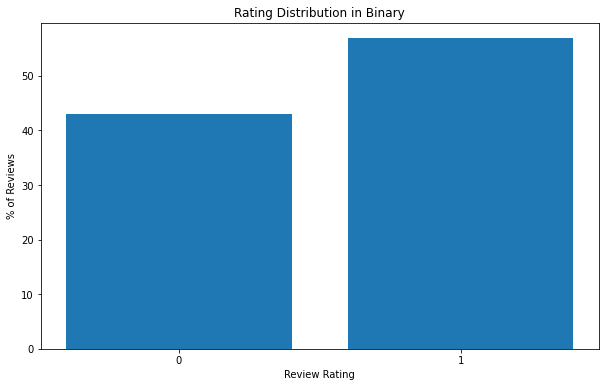

Class imbalance: [0.43 0.57]


In [22]:
# plotting the distribution of binary columns
values, counts = np.unique(data['Reviewer_Score'], return_counts=True)
normalized_counts = counts / counts.sum()
plt.figure(figsize=(10,6))
plt.bar(['0', '1'], normalized_counts * 100)  # plot normalized counts
plt.title('Rating Distribution in Binary')
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f'Class imbalance: {np.round(normalized_counts, 2)}')

After converting to binary column, the rating distribution is almost the same between the two. 0 means not good review, 1 means good review. The good review has slightly higher percentage than the not good review.

In [20]:
# Finding the country and city of the hotel
address = data['Hotel_Address'].str.rsplit(' ', 2, expand=True)
address.head()

,0,1,2
0,s Gravesandestraat 55 Oost 1092 AA,Amsterdam,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA,Amsterdam,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA,Amsterdam,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA,Amsterdam,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA,Amsterdam,Netherlands


In [124]:
print(f'The hotels are located in {address[1].unique()} cities.')     

The hotels are located in ['Amsterdam' 'United' 'Paris' 'Barcelona' 'Milan' 'Vienna'] cities.


In [69]:
print(f'The hotels are located in {address[2].unique()} with Kingdom refer to United Kingdom.')

The hotels are located in ['Netherlands' 'Kingdom' 'France' 'Spain' 'Italy' 'Austria'] with Kingdom refer to United Kingdom.


In [21]:
# taking the percentage of hotel resides in each country 
addr = address[2].value_counts(normalize = True)*100

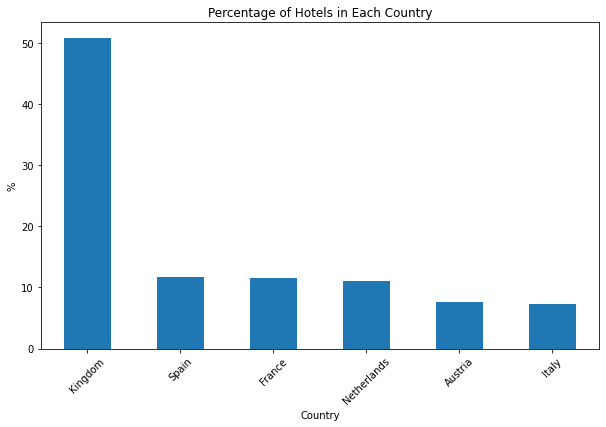

In [22]:
# plot the country where hotel address
plt.figure(figsize=(10,6))
addr.plot(kind='bar')
plt.title('Percentage of Hotels in Each Country')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.ylabel('%')
plt.show()

Kingdom in here refers to United Kingdom. The hotel in the data located in 6 countries in Europe: U.K., Spain, France, Netherlands, Austria, and Italy. Half of the hotels in the data are located in the United Kingdom. 

In [144]:
# Additional Number of Scoring
data['Additional_Number_of_Scoring'].value_counts(normalize=True)

2682    0.009295
2288    0.008261
2623    0.008092
1831    0.006943
1936    0.006234
          ...   
7       0.000109
5       0.000076
17      0.000047
1       0.000025
4       0.000023
Name: Additional_Number_of_Scoring, Length: 480, dtype: float64

According the Kaggle, this number indicates how many valid scores without review in there. It looks like 2682 is the most additional number of scoring.

In [115]:
# Review_Date change dtype into datetime 
data['Review_Date'] = data['Review_Date'].astype('datetime64')

In [24]:
# percentage of review each year
year = data['Review_Date'].dt.year.value_counts(normalize=True)*100
year

2016    51.270739
2017    30.410976
2015    18.318285
Name: Review_Date, dtype: float64

In [25]:
# looking at month
month = data['Review_Date'].dt.month.value_counts(normalize=True)*100
month

8     9.824111
7     9.562471
5     9.017065
10    8.496114
4     8.318323
6     8.318129
9     8.218170
1     8.175470
3     7.972446
12    7.681110
2     7.441015
11    6.975575
Name: Review_Date, dtype: float64

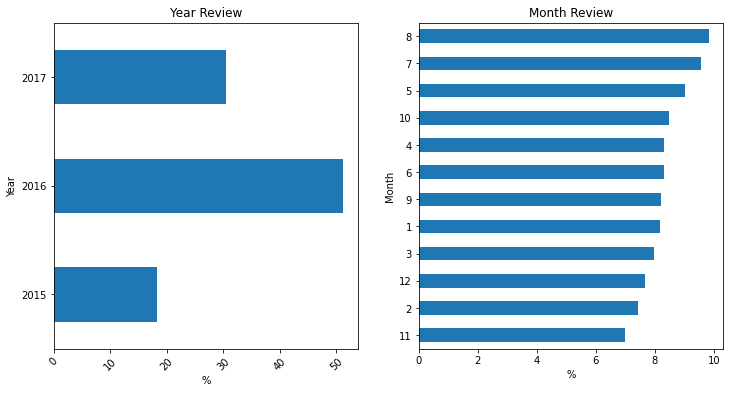

In [26]:
# plotting the year and month review

plt.subplots(1,2, figsize=(12,6))
plt.subplot(1,2,1)
year.sort_index().plot(kind='barh')
plt.title('Year Review')
plt.ylabel('Year')
plt.xlabel('%')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
month.sort_values().plot(kind='barh')
plt.title('Month Review')
plt.ylabel('Month')
plt.xlabel('%')
plt.show()

The year of review was between 2015 and 2017. The highest review was observed in 2016. <br />
Most reviews were observed in the month of August and July, where it were summer time. Meanwhile, November was the month where there was the least review. Clearly, the season affects the number of travellers. In addition, summer break also affects the number of travellers, especially for travellers with family. 

In [27]:
# Looking at Average_Score
data['Average_Score'].value_counts(normalize=True)

8.4    0.080008
8.1    0.073987
8.5    0.073884
8.7    0.073364
8.6    0.071706
8.2    0.067636
8.3    0.063818
8.8    0.059851
8.9    0.055259
8.0    0.043363
9.1    0.041496
9.0    0.040682
7.8    0.038613
7.9    0.028819
7.5    0.026628
9.2    0.025106
9.3    0.024570
7.7    0.022959
9.4    0.018127
7.1    0.013160
7.6    0.012973
7.4    0.012228
7.3    0.007758
7.0    0.007568
6.9    0.003371
6.8    0.002531
9.5    0.002343
6.4    0.002257
6.7    0.001873
9.6    0.001776
7.2    0.001328
6.6    0.000776
5.2    0.000126
9.8    0.000054
Name: Average_Score, dtype: float64

Since it is a float number, we are going to round it up.

In [28]:
avg_score = round(data['Average_Score']).astype('int')
avg_score

0         8
1         8
2         8
3         8
4         8
         ..
515733    8
515734    8
515735    8
515736    8
515737    8
Name: Average_Score, Length: 515212, dtype: int64

In [29]:
avg_score1 = avg_score.value_counts(normalize=True)*100
avg_score1

8     53.268946
9     41.016125
7      5.059277
10     0.417304
6      0.225732
5      0.012616
Name: Average_Score, dtype: float64

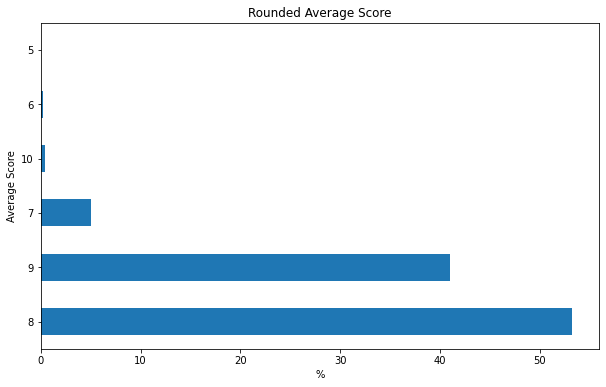

In [30]:
# Looking into Average score
plt.figure(figsize=(10,6))
avg_score1.plot(kind='barh')
plt.title('Rounded Average Score')
plt.ylabel('Average Score')
plt.xlabel('%')
plt.show()

More than 50% of the time, the average score is 8.

In [31]:
# Hotel_Name
hotel_name = data['Hotel_Name'].value_counts(normalize=True)*100
hotel_name

Britannia International Hotel Canary Wharf           0.929520
Strand Palace Hotel                                  0.826068
Park Plaza Westminster Bridge London                 0.809181
Copthorne Tara Hotel London Kensington               0.694277
DoubleTree by Hilton Hotel London Tower of London    0.623433
                                                       ...   
Boundary Rooms Suites                                0.002329
Hotel Daniel Paris                                   0.002329
Hotel Wagner                                         0.001941
Mercure Paris Porte d Orleans                        0.001941
Hotel Gallitzinberg                                  0.001553
Name: Hotel_Name, Length: 1492, dtype: float64

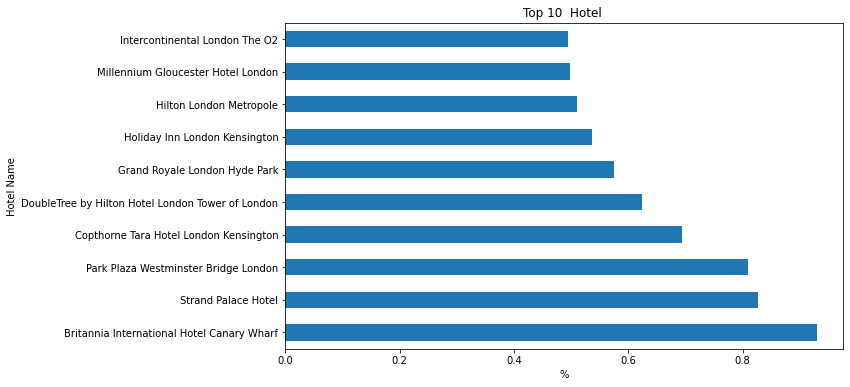

In [32]:
# Plot
plt.figure(figsize=(10,6))
hotel_name.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10  Hotel ')
plt.ylabel('Hotel Name')
plt.xlabel('%')
plt.show()

The top 10 Hotel names are located in London, UK. The most favourite one is Britannia International Hotel Canary Wharf.

In [33]:
# Reviewer_Nationality
nationality = data['Reviewer_Nationality'].value_counts(normalize=True)*100

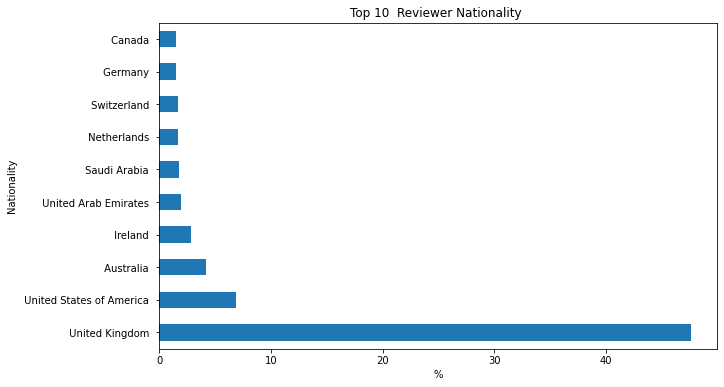

In [35]:
plt.figure(figsize=(10,6))
nationality.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10  Reviewer Nationality ')
plt.ylabel('Nationality')
plt.xlabel('%')
plt.show()

Most of the Reviewers are British.

In [116]:
# Negative Review
data['Negative_Review'].str.split()

0         [I, am, so, angry, that, i, made, this, post, ...
1                                            [No, Negative]
2         [Rooms, are, nice, but, for, elderly, a, bit, ...
3         [My, room, was, dirty, and, I, was, afraid, to...
4         [You, When, I, booked, with, your, company, on...
                                ...                        
515733    [no, trolly, or, staff, to, help, you, take, t...
515734    [The, hotel, looks, like, 3, but, surely, not, 4]
515735    [The, ac, was, useless, It, was, a, hot, week,...
515736                                       [No, Negative]
515737    [I, was, in, 3rd, floor, It, didn, t, work, Fr...
Name: Negative_Review, Length: 515212, dtype: object

In [33]:
# Just to check
data.loc[data['Negative_Review'] == 'No Negative']

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands
13,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-04,7.7,Hotel Arena,Italy,No Negative,0,1403,This hotel is being renovated with great care...,59,6,1,"[' Business trip ', ' Solo traveler ', ' Duple...",30 days,52.360576,4.915968,Netherlands
15,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-03,7.7,Hotel Arena,Italy,No Negative,0,1403,This hotel is awesome I took it sincirely bec...,82,26,1,"[' Leisure trip ', ' Couple ', ' Duplex Double...",31 days,52.360576,4.915968,Netherlands
18,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-06-29,7.7,Hotel Arena,Netherlands,No Negative,0,1403,Public areas are lovely and the room was nice...,33,4,0,"[' Business trip ', ' Group ', ' Duplex Double...",35 days,52.360576,4.915968,Netherlands
48,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-03-22,7.7,Hotel Arena,United Kingdom,No Negative,0,1403,The quality of the hotel was brilliant and ev...,77,3,1,"[' Leisure trip ', ' Couple ', ' Duplex Double...",134 day,52.360576,4.915968,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515723,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-11-15,8.1,Atlantis Hotel Vienna,Croatia,No Negative,0,2823,Second to none location if you re off to Stad...,23,1,1,"[' Leisure trip ', ' Group ', ' Standard Tripl...",627 day,48.203745,16.335677,Austria
515724,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-10-27,8.1,Atlantis Hotel Vienna,India,No Negative,0,2823,Only location little far away from City,9,7,0,"[' Leisure trip ', ' Family with young childre...",646 day,48.203745,16.335677,Austria
515729,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-09-26,8.1,Atlantis Hotel Vienna,Brazil,No Negative,0,2823,The breakfast was excelent lots of fress frui...,27,7,1,"[' Leisure trip ', ' Couple ', ' Standard Doub...",677 day,48.203745,16.335677,Austria
515732,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-09-06,8.1,Atlantis Hotel Vienna,Kuwait,No Negative,0,2823,helpful staff allowed me to check in early as...,18,6,1,"[' Leisure trip ', ' Family with young childre...",697 day,48.203745,16.335677,Austria


Meanwhile, there is a review with 'No Negative' comment. There are 127757 rows with that comment which is around 25%. I might use max_df in the parameter.

In [30]:
# review total negative word counts
data['Review_Total_Negative_Word_Counts'].sort_values(ascending=False)

307286    408
402527    403
337402    403
481879    402
512777    402
         ... 
387842      0
387843      0
239195      0
387845      0
241738      0
Name: Review_Total_Negative_Word_Counts, Length: 515212, dtype: int64

In [61]:
# max word count for negative review
print(f"Max word counts for total negative word: {data['Review_Total_Negative_Word_Counts'].max()}")
print(f"Min word counts for total negative word: {data['Review_Total_Negative_Word_Counts'].min()}")
print(f"Median word counts for total negative word: {data['Review_Total_Negative_Word_Counts'].median()}")
print(f"Average word counts for total negative word: {data['Review_Total_Negative_Word_Counts'].mean()}")

Max word counts for total negative word: 408
Min word counts for total negative word: 0
Median word counts for total negative word: 9.0
Average word counts for total negative word: 18.540822030542767


In [31]:
# Just to check
data.loc[data['Review_Total_Negative_Word_Counts'] == 408]

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
307286,Damrak 1 5 Amsterdam City Center 1012 LG Amste...,973,2016-07-22,8.0,Park Plaza Victoria Amsterdam,United Kingdom,The staff Had a bad experience even after boo...,408,4820,Slept well quiet rooms and enjoyed the view a...,17,8,0,"[' Business trip ', ' Solo traveler ', ' Doubl...",377 day,52.377278,4.897818,Netherlands


In [76]:
# Total Number of Review
data['Total_Number_of_Reviews'].sort_values()

250473       43
250467       43
250469       43
250470       43
250471       43
          ...  
488901    16670
488900    16670
488899    16670
488911    16670
489833    16670
Name: Total_Number_of_Reviews, Length: 515212, dtype: int64

In [89]:
# the hotel with maximum total number of reviews
data.loc[data['Total_Number_of_Reviews'] == 16670].head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
488409,Via Senigallia 6 20161 Milan Italy,904,8/1/2017,8.1,Hotel Da Vinci,United Kingdom,The lighting in the room is so low brilliant ...,87,16670,The hotel is massive looks a bit like Austin ...,90,2,1,"[' Leisure trip ', ' Group ', ' Double Room ',...",2 days,45.533137,9.171102,Italy
488410,Via Senigallia 6 20161 Milan Italy,904,8/1/2017,8.1,Hotel Da Vinci,Australia,The Breakfast was very average and the guy th...,24,16670,The room was a big size its a Very big hotel ...,145,14,0,"[' Leisure trip ', ' Couple ', ' Double Room '...",2 days,45.533137,9.171102,Italy
488411,Via Senigallia 6 20161 Milan Italy,904,8/1/2017,8.1,Hotel Da Vinci,Belgium,No comment Everything was very good,8,16670,Was a clean place The apartment was very comf...,31,14,1,"[' Leisure trip ', ' Group ', ' 2 rooms ', ' S...",2 days,45.533137,9.171102,Italy


In [90]:
# the hotel with minimum total number of reviews
data.loc[data['Total_Number_of_Reviews'] == 43].head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
250467,8 rue Fr d ric Bastiat 8th arr 75008 Paris France,9,5/10/2016,8.8,Hotel Daniel Paris,United Kingdom,No gym they offer access to a gym close by We...,25,43,Very friendly and helpful reception staff who...,51,1,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",450 day,48.872849,2.307366,France
250468,8 rue Fr d ric Bastiat 8th arr 75008 Paris France,9,4/20/2016,8.8,Hotel Daniel Paris,Germany,There are two issues that surprised me and th...,182,43,With its mixture of Asian and old French styl...,65,8,1,"[' Leisure trip ', ' Solo traveler ', ' Single...",470 day,48.872849,2.307366,France
250469,8 rue Fr d ric Bastiat 8th arr 75008 Paris France,9,3/10/2017,8.8,Hotel Daniel Paris,Ireland,room very small Shower tricky as within a bat...,10,43,staff were amaazing helpful,5,2,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",146 day,48.872849,2.307366,France


Hotel Da Vinci in Italy got the most number of reviews, on the other hand, Hotel Daniel Paris in Paris got the least number of reviews.

In [117]:
# Positive Review
data['Positive_Review'].str.split()

0         [Only, the, park, outside, of, the, hotel, was...
1         [No, real, complaints, the, hotel, was, great,...
2         [Location, was, good, and, staff, were, ok, It...
3         [Great, location, in, nice, surroundings, the,...
4         [Amazing, location, and, building, Romantic, s...
                                ...                        
515733                                           [location]
515734    [Breakfast, was, ok, and, we, got, earlier, ch...
515735                                       [No, Positive]
515736    [The, rooms, are, enormous, and, really, comfo...
515737                             [staff, was, very, kind]
Name: Positive_Review, Length: 515212, dtype: object

In [92]:
# Just to check
data.loc[data['Positive_Review'] == 'No Positive']

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968,Netherlands
32,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,5/11/2017,7.7,Hotel Arena,United States of America,Our bathroom had an urine order Shower was ve...,68,1403,No Positive,0,1,0,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",84 days,52.360576,4.915968,Netherlands
98,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,9/19/2016,7.7,Hotel Arena,United Kingdom,Got charged 50 for a birthday package when it...,112,1403,No Positive,0,1,0,"[' Leisure trip ', ' Couple ', ' Large King Ro...",318 day,52.360576,4.915968,Netherlands
121,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,6/1/2016,7.7,Hotel Arena,United States of America,The first room had steep steps to a loft bed ...,39,1403,No Positive,0,12,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",428 day,52.360576,4.915968,Netherlands
134,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,5/1/2016,7.7,Hotel Arena,Australia,Foyer was a mess Only place to relax was the ...,180,1403,No Positive,0,6,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",459 day,52.360576,4.915968,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515666,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,9/20/2016,8.1,Atlantis Hotel Vienna,Belgium,Noise from the air conditioning system imposs...,11,2823,No Positive,0,19,0,"[' Family with young children ', ' Family Room...",317 day,48.203745,16.335677,Austria
515688,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,7/11/2016,8.1,Atlantis Hotel Vienna,Romania,Parking to expensive and so is the breakfast,9,2823,No Positive,0,2,0,"[' Couple ', ' Standard Double or Twin Room ',...",388 day,48.203745,16.335677,Austria
515695,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,6/27/2016,8.1,Atlantis Hotel Vienna,South Korea,dust towel,3,2823,No Positive,0,2,0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",402 day,48.203745,16.335677,Austria
515700,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,5/29/2016,8.1,Atlantis Hotel Vienna,Russia,Room vas located in different building with n...,25,2823,No Positive,0,2,0,"[' Business trip ', ' Solo traveler ', ' Stand...",431 day,48.203745,16.335677,Austria


There are 35904 rows with comment of 'No Positive'. It is around 7%. I might use max_df in the parameter.

In [152]:
data.shape

(515212, 18)

In [51]:
# review total positive word counts
data['Review_Total_Positive_Word_Counts'].sort_values(ascending=False)

278453    395
410662    386
344261    384
218707    384
395989    383
         ... 
154637      0
154640      0
469790      0
154642      0
375484      0
Name: Review_Total_Positive_Word_Counts, Length: 515212, dtype: int64

In [52]:
# max word count for positive review
print(f"Max word counts for total positive word: {data['Review_Total_Positive_Word_Counts'].max()}")
print(f"Min word counts for total positive word: {data['Review_Total_Positive_Word_Counts'].min()}")
print(f"Median word counts for total positive word: {data['Review_Total_Positive_Word_Counts'].median()}")
print(f"Average word counts for total positive word: {data['Review_Total_Positive_Word_Counts'].mean()}")

Max word counts for total positive word: 395
Min word counts for total positive word: 0
Median word counts for total positive word: 11.0
Average word counts for total positive word: 17.778256329433322


In [94]:
# Total number of reviews Reviewer has given
data['Total_Number_of_Reviews_Reviewer_Has_Given'].sort_values()

515737      1
190851      1
434966      1
190855      1
434964      1
         ... 
118280    315
118402    315
26454     315
227989    330
335354    355
Name: Total_Number_of_Reviews_Reviewer_Has_Given, Length: 515212, dtype: int64

The minimum reviews that reviewers have given are 1 and the maximum are 355.

In [42]:
# Tags
data['Tags'].unique()

array(["[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']",
       "[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']",
       "[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']",
       ...,
       "[' Leisure trip ', ' Solo traveler ', ' Superior Double Room with Garden View ', ' Stayed 1 night ', ' Submitted from a mobile device ']",
       "[' Business trip ', ' Solo traveler ', ' Superior Double Room with Garden View ', ' Stayed 2 nights ']",
       "[' Leisure trip ', ' Family with young children ', ' Standard Double or Twin Room ', ' Stayed 10 nights ']"],
      dtype=object)

In [48]:
# Split after comma
tags = data['Tags'].str.split(',', n=1, expand=True)
tags

,0,1
0,[' Leisure trip ',"' Couple ', ' Duplex Double Room ', ' Stayed ..."
1,[' Leisure trip ',"' Couple ', ' Duplex Double Room ', ' Stayed ..."
2,[' Leisure trip ',"' Family with young children ', ' Duplex Doub..."
3,[' Leisure trip ',"' Solo traveler ', ' Duplex Double Room ', ' ..."
4,[' Leisure trip ',"' Couple ', ' Suite ', ' Stayed 2 nights ', '..."
...,...,...
515733,[' Leisure trip ',"' Family with older children ', ' 2 rooms ', ..."
515734,[' Leisure trip ',"' Family with young children ', ' Standard Tr..."
515735,[' Leisure trip ',"' Family with older children ', ' 2 rooms ', ..."
515736,[' Leisure trip ',"' Group ', ' Standard Triple Room ', ' Stayed..."


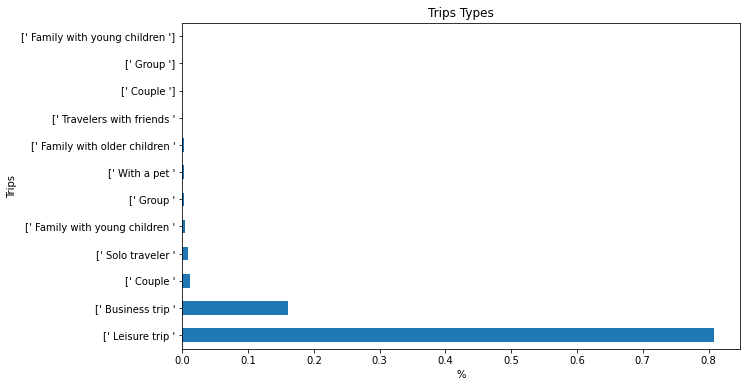

In [50]:
# plot
plt.figure(figsize=(10,6))
tags[0].value_counts(normalize=True).plot(kind='barh')
plt.title('Trips Types')
plt.ylabel('Trips')
plt.xlabel('%')
plt.show()

It seems the trip can be divided into 2 as a big picture: business trip and leisure trip since other categories beside business trip and leisure trip could be included leisure trip. Based on the graph, people who stayed at the hotel were more likely going on the leisure trips rather than the business trips.

In [96]:
# days_since_review
data['days_since_review'].head()

0     0 days
1     0 days
2     3 days
3     3 days
4    10 days
Name: days_since_review, dtype: object

In [118]:
# extracting the number from days_since_review
data['days_since_review'] = data['days_since_review'].str.extract('(\d+)')
data.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968,Netherlands


In [98]:
data['days_since_review'].sort_values()

0          0
250886     0
251309     0
251843     0
251844     0
          ..
94884     99
154978    99
154977    99
279496    99
9860      99
Name: days_since_review, Length: 515212, dtype: object

According to Kaggle, days_since_review is "duration between the review date and scrape date." The longest duration is 99 days and the shortest is 0 days. 

In [101]:
# Latitude
data['lat'].sort_values()

293039    41.328376
293323    41.328376
293324    41.328376
293325    41.328376
293326    41.328376
            ...    
383813    52.400181
383812    52.400181
383811    52.400181
383818    52.400181
384023    52.400181
Name: lat, Length: 515212, dtype: float64

The latitude of the hotel ranges from 41.328376 - 52.400181.

In [102]:
# Longitude
data['lng'].sort_values()

503118    -0.369758
503400    -0.369758
503399    -0.369758
503398    -0.369758
503397    -0.369758
            ...    
501177    16.429233
501176    16.429233
501175    16.429233
501191    16.429233
501174    16.429233
Name: lng, Length: 515212, dtype: float64

The longitude of the hotel ranges from -0.369758 - 16.429233.

In [119]:
# save the data to csv
data.to_csv('data1.csv', index=False)

In [124]:
# read
data1 = pd.read_csv('data1.csv')

In [125]:
#  dropping the non-numeric column
data1 = data1.drop(['Hotel_Address', 'Hotel_Name', 'Reviewer_Nationality', 'Tags', 'Hotel_Country'], axis=1)

In [126]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515212 entries, 0 to 515211
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515212 non-null  int64  
 1   Review_Date                                 515212 non-null  object 
 2   Average_Score                               515212 non-null  float64
 3   Negative_Review                             515212 non-null  object 
 4   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 5   Total_Number_of_Reviews                     515212 non-null  int64  
 6   Positive_Review                             515212 non-null  object 
 7   Review_Total_Positive_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515212 non-null  int64  
 9   Reviewer_Score                              515212 non-null  int64  
 

In [127]:
# Changing Review_Date into the year only
data1['Review_Date'] = pd.to_datetime(data1['Review_Date'])
data1['Review_Date'] = data1['Review_Date'].dt.year
data1.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng
0,194,2017,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968
1,194,2017,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968
2,194,2017,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968
3,194,2017,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968
4,194,2017,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968


In [128]:
# take 10% sample
df = data1.sample(frac=0.10, ignore_index=True)

In [129]:
df      #There are 51521 rows and 13 columns

,Additional_Number_of_Scoring,Review_Date,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng
0,78,2015,8.7,None,2,866,All,2,9,1,678,48.210268,16.374127
1,38,2017,8.9,Had to ask for coffee twice for the room at t...,88,326,Being new was nice Room was spacious and bath...,21,1,0,80,48.860619,2.344401
2,211,2017,8.9,Although we asked for a non smoking room our ...,19,2412,No Positive,0,1,0,184,48.872174,2.328075
3,305,2017,8.3,Leaving after one night,6,1719,Convenient comfortable chic and cheap,7,39,1,125,51.491571,-0.196319
4,144,2016,8.4,No Negative,0,1380,very nice rooms and exelent staff everybody w...,13,7,1,459,48.235379,16.421974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51516,267,2016,8.7,No Negative,0,872,Excellent,2,5,1,542,51.511011,-0.077125
51517,303,2017,8.9,Nothing,2,1110,It was perfect excellent location,6,5,1,73,51.531427,-0.126133
51518,272,2016,8.1,Curtain was stained with coffee and a bit tor...,27,1615,The room is small but very nice Design qualit...,31,2,1,486,52.364962,4.873495
51519,538,2016,8.2,No Negative,0,3342,Helpful friendly staff Great choice for break...,9,4,1,450,52.376046,4.894392


In [130]:
# save the df
df.to_csv('df.csv', index=False)

## Count Vectorizer

In [2]:
# read df
df = pd.read_csv('df.csv')

In [242]:
# define X and y
X = df.drop(['Reviewer_Score'], axis=1)
y = df['Reviewer_Score']

In [295]:
# splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [10]:
# to know how many rows in X_train and X_test
print(f'X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns.')
print(f'X_train has {X_test.shape[0]} rows and {X_test.shape[1]} columns.')

X_train has 34519 rows and 12 columns.
X_train has 17002 rows and 12 columns.


In [11]:
# 1. Instantiate bag of words without any parameters
bow1 = CountVectorizer()    #for X_train['negative review']
bow2 = CountVectorizer()    #for X_train['positive review']
bow3 = CountVectorizer()    #for X_test['negative review']
bow4 = CountVectorizer()    #for X_test['positive review']

# 2. Fit & Transform
train_neg = bow1.fit_transform(X_train['Negative_Review'])
train_pos = bow2.fit_transform(X_train['Positive_Review'])
test_neg = bow3.fit_transform(X_test['Negative_Review'])
test_pos = bow4.fit_transform(X_test['Positive_Review'])

In [13]:
# Checking the shape 
train_neg

<34519x14807 sparse matrix of type '<class 'numpy.int64'>'
	with 484596 stored elements in Compressed Sparse Row format>

In [14]:
train_pos

<34519x12632 sparse matrix of type '<class 'numpy.int64'>'
	with 468653 stored elements in Compressed Sparse Row format>

In [20]:
test_neg

<17002x10563 sparse matrix of type '<class 'numpy.int64'>'
	with 235132 stored elements in Compressed Sparse Row format>

In [15]:
test_pos

<17002x8842 sparse matrix of type '<class 'numpy.int64'>'
	with 230817 stored elements in Compressed Sparse Row format>

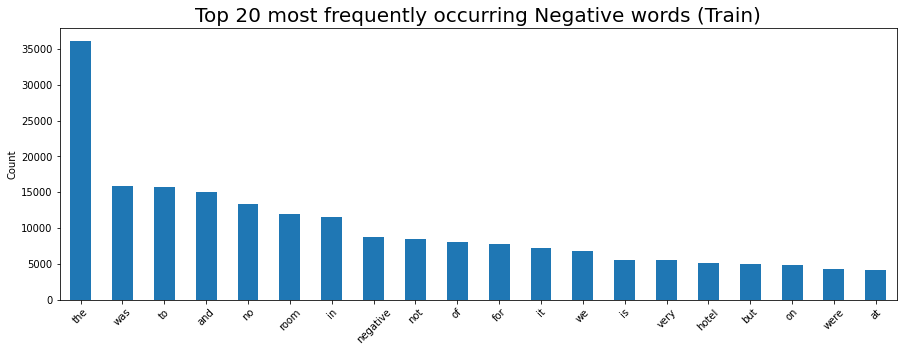

In [18]:
# Plot train_neg
train_neg_wordcount = pd.DataFrame(
    {'counts' : train_neg.toarray().sum(axis=0)},
    index=bow1.get_feature_names_out()
)

train_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Train)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

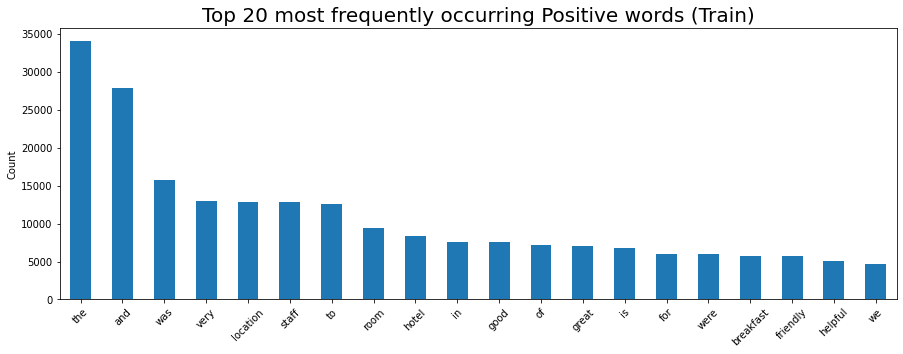

In [19]:
# Plot train_pos
train_pos_wordcount = pd.DataFrame(
    {'counts' : train_pos.toarray().sum(axis=0)},
    index=bow2.get_feature_names_out()
)

train_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Train)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

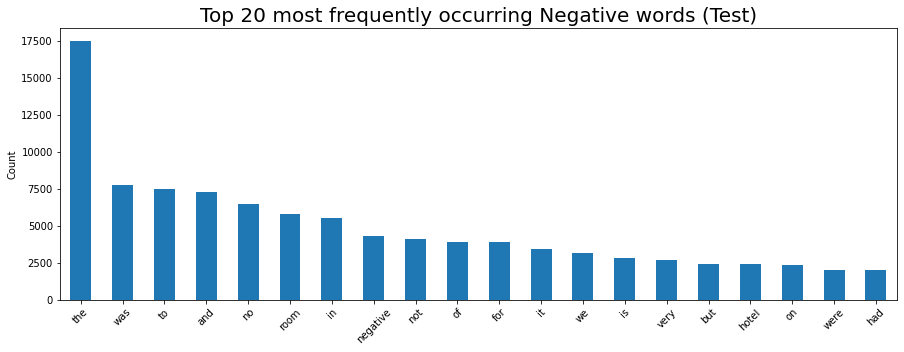

In [22]:
# Plot test_neg
test_neg_wordcount = pd.DataFrame(
    {'counts' : test_neg.toarray().sum(axis=0)},
    index=bow3.get_feature_names_out()
)

test_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Test)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

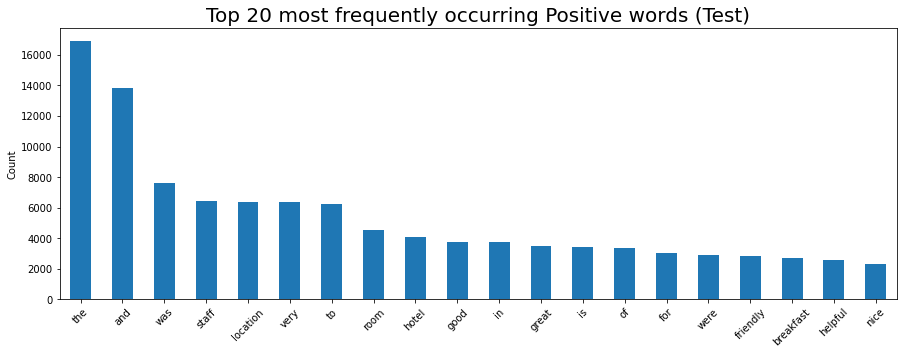

In [23]:
# Plot test_pos
test_pos_wordcount = pd.DataFrame(
    {'counts' : test_pos.toarray().sum(axis=0)},
    index=bow4.get_feature_names_out()
)

test_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Test)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Without any parameters:
- X_train['Negative_Review'] has 14807 columns and the top 5 words are: 'the', 'was', 'to', 'and', and 'no'.
- X_train['Positive_Review'] has 12632 columns and the top 5 words are: 'the', 'and', 'was', 'very', and 'location'.
- X_test['Negative_Review'] has 10563 columns and the top 5 words are: 'the', 'was', 'to', 'and', and 'no'.
- X_test['Positive_Review'] has 8842 columns and the top 5 words are: 'the', 'and', 'was', 'staff', and 'location'.

Most of the words are common words that does not have meaning like 'the', 'and', and 'was'. The words for train_pos are very similar to the test_pos. The same happenned with train_neg and test_neg. <br /> <p>
Next, I will use parameters `stop_words` and `min_df`.

In [24]:
# 1. Instantiate bag of words
bow1 = CountVectorizer(stop_words='english', min_df=5)      #for X_train['negative review']
bow2 = CountVectorizer(stop_words='english', min_df=5)      #for X_train['positive review']
bow3 = CountVectorizer(stop_words='english', min_df=5)      #for X_test['negative review']
bow4 = CountVectorizer(stop_words='english', min_df=5)      #for X_test['positive review']

# 2. Fit & Transform
train_neg = bow1.fit_transform(X_train['Negative_Review'])
train_pos = bow2.fit_transform(X_train['Positive_Review'])
test_neg = bow3.fit_transform(X_test['Negative_Review'])
test_pos = bow4.fit_transform(X_test['Positive_Review'])

In [25]:
# Checking the shape 
train_neg

<34519x4161 sparse matrix of type '<class 'numpy.int64'>'
	with 247311 stored elements in Compressed Sparse Row format>

In [26]:
# check the shape 
train_pos             # there are 4001 columns created

<34519x3235 sparse matrix of type '<class 'numpy.int64'>'
	with 282180 stored elements in Compressed Sparse Row format>

In [27]:
test_neg

<17002x2785 sparse matrix of type '<class 'numpy.int64'>'
	with 115900 stored elements in Compressed Sparse Row format>

In [28]:
test_pos

<17002x2167 sparse matrix of type '<class 'numpy.int64'>'
	with 136397 stored elements in Compressed Sparse Row format>

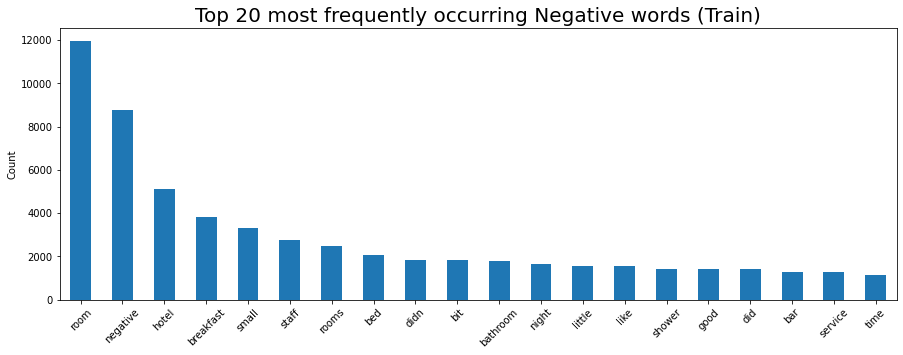

In [29]:
# Plot train_neg
train_neg_wordcount = pd.DataFrame(
    {'counts' : train_neg.toarray().sum(axis=0)},
    index=bow1.get_feature_names_out()
)

train_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Train)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

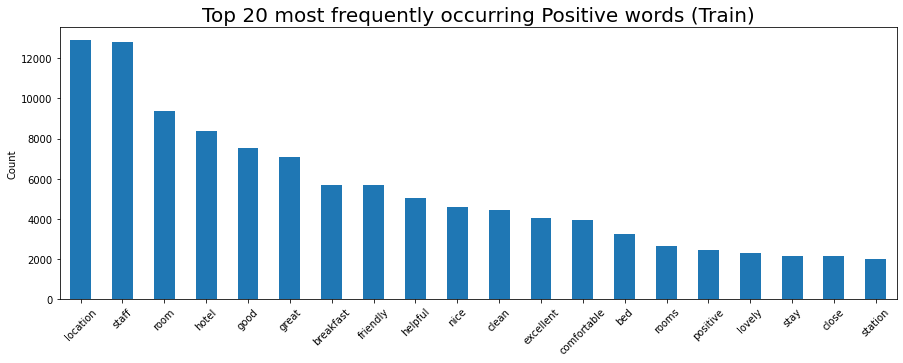

In [30]:
# Plot train_pos
train_pos_wordcount = pd.DataFrame(
    {'counts' : train_pos.toarray().sum(axis=0)},
    index=bow2.get_feature_names_out()
)

train_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Train)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

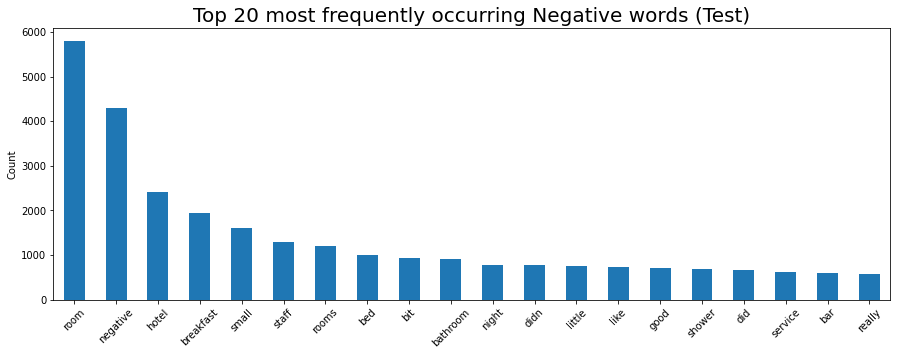

In [31]:
# Plot test_neg
test_neg_wordcount = pd.DataFrame(
    {'counts' : test_neg.toarray().sum(axis=0)},
    index=bow3.get_feature_names_out()
)

test_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Test)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

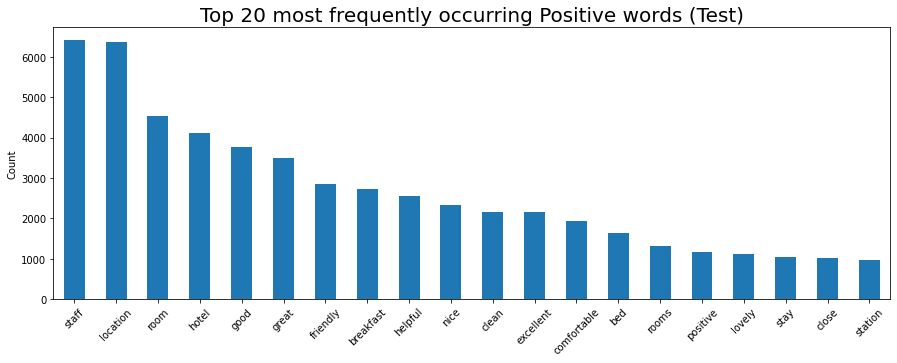

In [32]:
# Plot test_pos
test_pos_wordcount = pd.DataFrame(
    {'counts' : test_pos.toarray().sum(axis=0)},
    index=bow4.get_feature_names_out()
)

test_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Test)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Setting parameters `stop_words = 'english'` and `min_df=5`:
- X_train['Negative_Review'] has 4161 columns and the top 5 words are: 'room', 'negative', 'hotel', 'breakfast', and 'small'.
- X_train['Positive_Review'] has 3235 columns and the top 5 words are: 'location', 'staff', 'room', 'hotel', and 'good'.
- X_test['Negative_Review'] has 2785 columns and the top 5 words are: 'room', 'negative', 'hotel', 'breakfast', and 'small'.
- X_test['Positive_Review'] has 2167 columns and the top 5 words are: 'staff', location', 'room', 'hotel', and 'good'.

All of them have fewer columns now by using those parameters and they do not have common words. Again, the words for train_pos are very similar to the test_pos. The same happenned with train_neg and test_neg. <br /> <p>
Next, I will use parameters `tokenizers` and using the custom tokenizer just like in the lecture.

In [33]:
# Custom tokenizer just like in the lecture
import nltk
import string
#Stemming
stemmer = nltk.stem.PorterStemmer()

# import the nltk stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, "").lower()

    # split sentence into words
    listofwords = sentence.split(" ")
    listofstemmed_words = []

    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in stop_words) and (word != ""):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melianaponiman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Checking tokenizer
sentence = 'Cocomelon was playing on the TV. The bands were marching through the street. It is very loud. I could see it from my room, Their feet are so big. I have seen it every night. Can you be louder?'
my_tokenizer(sentence)      

['cocomelon',
 'play',
 'tv',
 'band',
 'march',
 'street',
 'loud',
 'could',
 'see',
 'room',
 'feet',
 'big',
 'seen',
 'everi',
 'night',
 'louder']

In [35]:
# 1. Instantiate bag of words
# for X_train['negative review']
bow1 = CountVectorizer(tokenizer=my_tokenizer)    
# for X_train['positive review']
bow2 = CountVectorizer(tokenizer=my_tokenizer)    
# for X_test['negative review']
bow3 = CountVectorizer(tokenizer=my_tokenizer)
# for X_test['positive review']
bow4 = CountVectorizer(tokenizer=my_tokenizer)

# 2. Fit & Transform
train_neg = bow1.fit_transform(X_train['Negative_Review'])
train_pos = bow2.fit_transform(X_train['Positive_Review'])
test_neg = bow3.fit_transform(X_test['Negative_Review'])
test_pos = bow4.fit_transform(X_test['Positive_Review'])

In [40]:
# Checking the shape 
train_neg         

<34519x10347 sparse matrix of type '<class 'numpy.int64'>'
	with 291387 stored elements in Compressed Sparse Row format>

In [41]:
train_pos

<34519x9448 sparse matrix of type '<class 'numpy.int64'>'
	with 316458 stored elements in Compressed Sparse Row format>

In [42]:
test_neg

<17002x7455 sparse matrix of type '<class 'numpy.int64'>'
	with 141469 stored elements in Compressed Sparse Row format>

In [43]:
test_pos

<17002x6579 sparse matrix of type '<class 'numpy.int64'>'
	with 156421 stored elements in Compressed Sparse Row format>

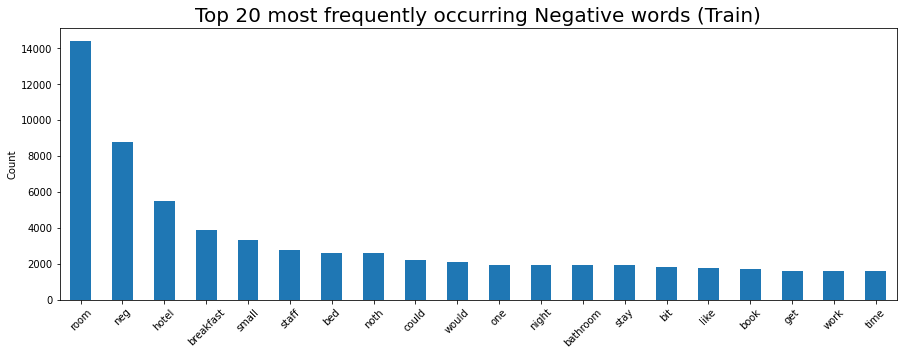

In [44]:
# Plot train_neg
train_neg_wordcount = pd.DataFrame(
    {'counts' : train_neg.toarray().sum(axis=0)},
    index=bow1.get_feature_names_out()
)

train_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Train)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

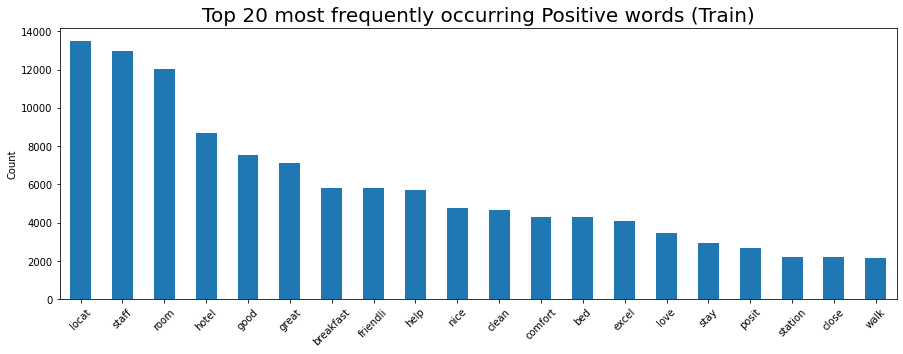

In [45]:
# Plot train_pos
train_pos_wordcount = pd.DataFrame(
    {'counts' : train_pos.toarray().sum(axis=0)},
    index=bow2.get_feature_names_out()
)

train_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Train)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

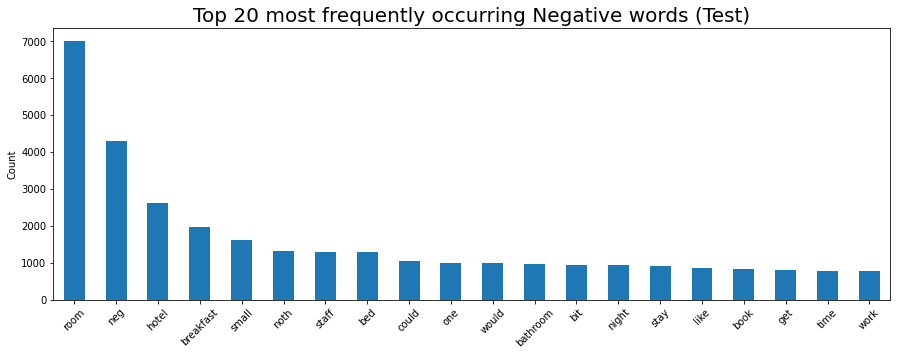

In [46]:
# Plot test_neg
test_neg_wordcount = pd.DataFrame(
    {'counts' : test_neg.toarray().sum(axis=0)},
    index=bow3.get_feature_names_out()
)

test_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Test)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

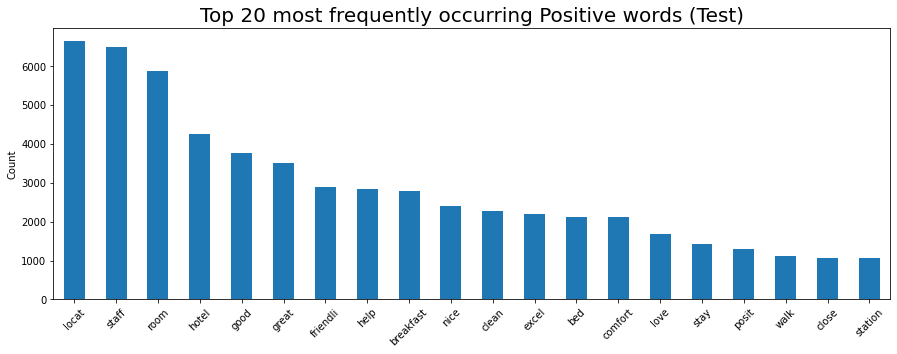

In [47]:
# Plot test_pos
test_pos_wordcount = pd.DataFrame(
    {'counts' : test_pos.toarray().sum(axis=0)},
    index=bow4.get_feature_names_out()
)

test_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Test)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Setting parameters `tokenizer=my_tokenizer`:
- X_train['Negative_Review'] has 10347 columns and the top 5 words are: 'room', 'neg', 'hotel', 'breakfast', and 'small'.
- X_train['Positive_Review'] has 9448 columns and the top 5 words are: 'locat', 'staff', 'room', 'hotel', and 'good'.
- X_test['Negative_Review'] has 7455 columns and the top 5 words are: 'room', 'neg', 'hotel', 'breakfast', and 'small'.
- X_test['Positive_Review'] has 6579 columns and the top 5 words are: 'locat', staff', 'room', 'hotel', and 'good'.

All of them have fewer columns (when using stemming) than the very first one (when there is no parameters used), but they have more columns now compare to the second one (when using `stop_words` and `min_df`). There is a `stop_words` used in custom tokenizer, so `min_df` has a big influence in reducing the number of columns or tokens.

Again, the words for train_pos are very similar to the test_pos. The same happenned with train_neg and test_neg. The difference is some of words get shortened, e.g.: 'location' becomes 'locat'.<br /> <p>
Next, I will use parameters `tokenizers` and adding the lemmatization in the custom tokenizer.

In [114]:
# string for punctuation
import string

#nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

#Stemming
stemmer = nltk.stem.PorterStemmer()

#Lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

# import the nltk stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

def my_tokenizer1(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, "").lower()

    # split sentence into words
    listofwords = sentence.split(" ")
    listofstemlemm_words = []

    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in stop_words) and (word != ""):
            # Stem words
            stemmed_word = stemmer.stem(word)
            lemma_word = lemmatizer.lemmatize(stemmed_word)
            listofstemlemm_words.append(lemma_word)

    return listofstemlemm_words

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/melianaponiman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/melianaponiman/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melianaponiman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
# Checking tokenizer
sentence = 'Cocomelon was playing on the TV. The bands were marching through the street. It is very loud. I could see it from my room, Their feet are so big. I have seen it every night. Can you be louder?'
my_tokenizer1(sentence)      

['cocomelon',
 'play',
 'tv',
 'band',
 'march',
 'street',
 'loud',
 'could',
 'see',
 'room',
 'foot',
 'big',
 'seen',
 'everi',
 'night',
 'louder']

The results seems to work the same as just using the stemmer. The difference is it recognizes that feet is the same as foot. I guess, the lemmatizer do not cover the whole words.

In [115]:
# 1. Instantiate bag of words
# for X_train['negative review']
bow1 = CountVectorizer(tokenizer=my_tokenizer1)    
# for X_train['positive review']
bow2 = CountVectorizer(tokenizer=my_tokenizer1)    
# for X_test['negative review']
bow3 = CountVectorizer(tokenizer=my_tokenizer1)
# for X_test['positive review']
bow4 = CountVectorizer(tokenizer=my_tokenizer1)

# 2. Fit & Transform
train_neg = bow1.fit_transform(X_train['Negative_Review'])
train_pos = bow2.fit_transform(X_train['Positive_Review'])
test_neg = bow3.fit_transform(X_test['Negative_Review'])
test_pos = bow4.fit_transform(X_test['Positive_Review'])

In [55]:
# Checking the shape 
train_neg  

<34519x10316 sparse matrix of type '<class 'numpy.int64'>'
	with 291378 stored elements in Compressed Sparse Row format>

In [56]:
train_pos

<34519x9419 sparse matrix of type '<class 'numpy.int64'>'
	with 316453 stored elements in Compressed Sparse Row format>

In [57]:
test_neg

<17002x7439 sparse matrix of type '<class 'numpy.int64'>'
	with 141465 stored elements in Compressed Sparse Row format>

In [58]:
test_pos

<17002x6557 sparse matrix of type '<class 'numpy.int64'>'
	with 156415 stored elements in Compressed Sparse Row format>

In [116]:
train_neg_wordcount = pd.DataFrame(
    {'counts' : train_neg.toarray().sum(axis=0)},
    index=bow1.get_feature_names_out()
)

train_pos_wordcount = pd.DataFrame(
    {'counts' : train_pos.toarray().sum(axis=0)},
    index=bow2.get_feature_names_out()
)

test_neg_wordcount = pd.DataFrame(
    {'counts' : test_neg.toarray().sum(axis=0)},
    index=bow3.get_feature_names_out()
)

test_pos_wordcount = pd.DataFrame(
    {'counts' : test_pos.toarray().sum(axis=0)},
    index=bow4.get_feature_names_out()
)

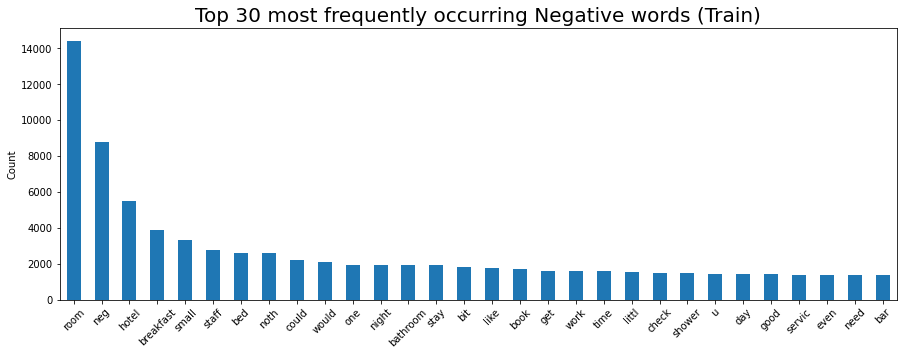

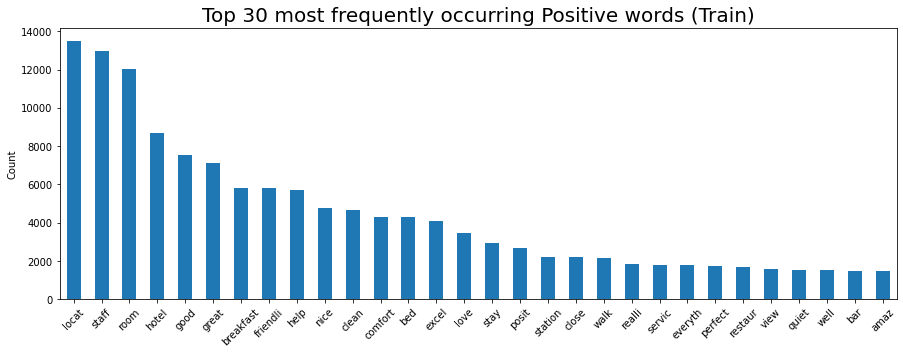

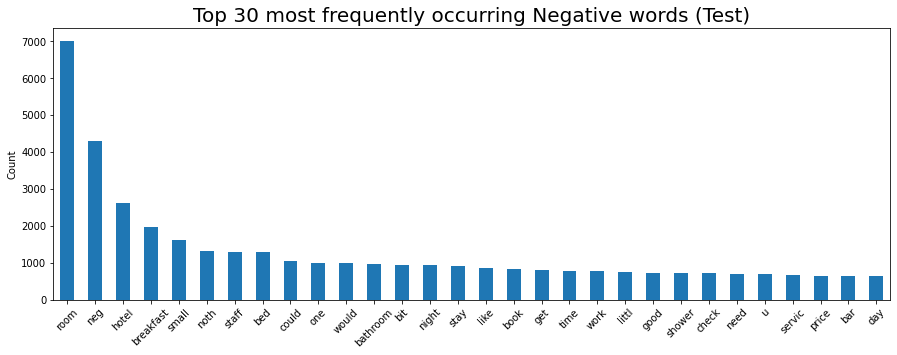

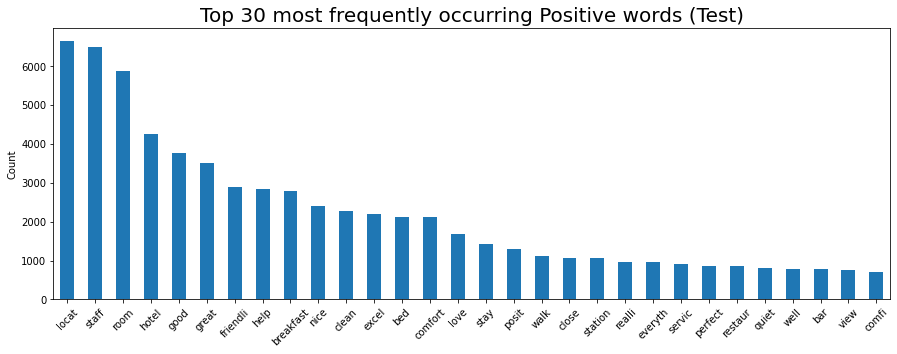

In [117]:
# Plot 
train_neg_wordcount.sort_values('counts', ascending=False).head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most frequently occurring Negative words (Train)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

train_pos_wordcount.sort_values('counts', ascending=False).head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most frequently occurring Positive words (Train)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

test_neg_wordcount.sort_values('counts', ascending=False).head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most frequently occurring Negative words (Test)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

test_pos_wordcount.sort_values('counts', ascending=False).head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most frequently occurring Positive words (Test)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Setting parameters `tokenizer=my_tokenize1`:
- X_train['Negative_Review'] has 10316 columns and the top 5 words are: 'room', 'neg', 'hotel', 'breakfast', and 'small'.
- X_train['Positive_Review'] has 9419 columns and the top 5 words are: 'locat', 'staff', 'room', 'hotel', and 'good'.
- X_test['Negative_Review'] has 7439 columns and the top 5 words are: 'room', 'neg', 'hotel', 'breakfast', and 'small'.
- X_test['Positive_Review'] has 6557 columns and the top 5 words are: 'locat', staff', 'room', 'hotel', and 'good'.

The columns are reduced by little bit (less than 100 words) when using stemming and lemmatization compare to just using stemming. It seems the top 5 words are the same as before. Also, some of the positive words are the same as negative words, such as: 'room', 'hotel', 'breakfast', 'staff', 'bed', 'stay', 'bar' and 'good'. There are also words like 'could', 'would' that do not have any meaning. <br /> <p>

So, I will use `extend` to the parameters `stopwords` to update those words in the dictionary.

In [133]:
# checking
neg_count = train_neg_wordcount
neg_count

,counts
0,18
00,167
000,3
002,1
006,1
...,...
zombi,1
zona,1
zone,14
zoo,1


In [131]:
pos_count = train_pos_wordcount.sort_values(by='counts', ascending=False)
pos_count

,counts
locat,13506
staff,12959
room,12049
hotel,8699
good,7524
...,...
lout,1
lourv,1
loungr,1
loungecaf,1


There are some numbers, so I will remove the number since it seems not having meaning. Also, as earlier in EDA, there are a lot of 'No Negative' and 'No Positive', I will also remove that. In addition, in the review, the punctuation seems to be erased already, so when there is contraction of words (i.e. 'don't'), it will become 'don' and 't'. I think that is why sometimes there is a single character that does not make sense.

In [296]:
# string for punctuation
import string

#nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

#Stemming
stemmer = nltk.stem.PorterStemmer()

#Lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

# import the nltk stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

new_words = ['room', 'hotel', 'breakfast', 'staff', 'bed', 'stay', 'could', 'would', 'bar', 'good']
stop_words = stopwords.words("english")
stop_words.extend(new_words)

def my_tokenizer2(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, "").lower()

    # remove 'no negative' and 'no positive'
    sentence = sentence.replace('no negative', '').replace('no positive', '')
    
    # remove digit
    new_sentence = ''.join([i for i in sentence if not i.isdigit()])

    # split sentence into words
    listofwords = new_sentence.split(" ")
    
    listofstemlemm_words = []

    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in stop_words) and (word != ""):
            # Stem words
            stemmed_word = stemmer.stem(word)
            lemma_word = lemmatizer.lemmatize(stemmed_word)
            listofstemlemm_words.append(lemma_word)

    return listofstemlemm_words

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/melianaponiman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/melianaponiman/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melianaponiman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I am going to use `tokenizer` and `min_df`.

In [203]:
# 1. Instantiate bag of words
# for X_train['negative review']
bow1 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5)    
# for X_train['positive review']
bow2 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5)    
# for X_test['negative review']
bow3 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5)
# for X_test['positive review']
bow4 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5)

# 2. Fit & Transform
train_neg = bow1.fit_transform(X_train['Negative_Review'])
train_pos = bow2.fit_transform(X_train['Positive_Review'])
test_neg = bow3.fit_transform(X_test['Negative_Review'])
test_pos = bow4.fit_transform(X_test['Positive_Review'])

In [204]:
# Checking the shape 
train_neg  

<34519x3141 sparse matrix of type '<class 'numpy.int64'>'
	with 240243 stored elements in Compressed Sparse Row format>

In [205]:
train_pos

<34519x2542 sparse matrix of type '<class 'numpy.int64'>'
	with 254249 stored elements in Compressed Sparse Row format>

In [206]:
test_neg

<17002x2247 sparse matrix of type '<class 'numpy.int64'>'
	with 114010 stored elements in Compressed Sparse Row format>

In [207]:
test_pos

<17002x1841 sparse matrix of type '<class 'numpy.int64'>'
	with 123727 stored elements in Compressed Sparse Row format>

In [199]:
# Dataframe
train_neg_wordcount = pd.DataFrame(
    {'counts' : train_neg.toarray().sum(axis=0)},
    index=bow1.get_feature_names_out()
)

train_pos_wordcount = pd.DataFrame(
    {'counts' : train_pos.toarray().sum(axis=0)},
    index=bow2.get_feature_names_out()
)

test_neg_wordcount = pd.DataFrame(
    {'counts' : test_neg.toarray().sum(axis=0)},
    index=bow3.get_feature_names_out()
)

test_pos_wordcount = pd.DataFrame(
    {'counts' : test_pos.toarray().sum(axis=0)},
    index=bow4.get_feature_names_out()
)

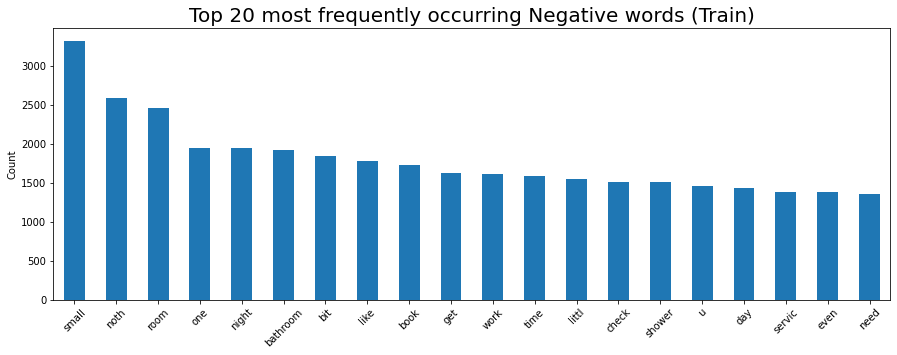

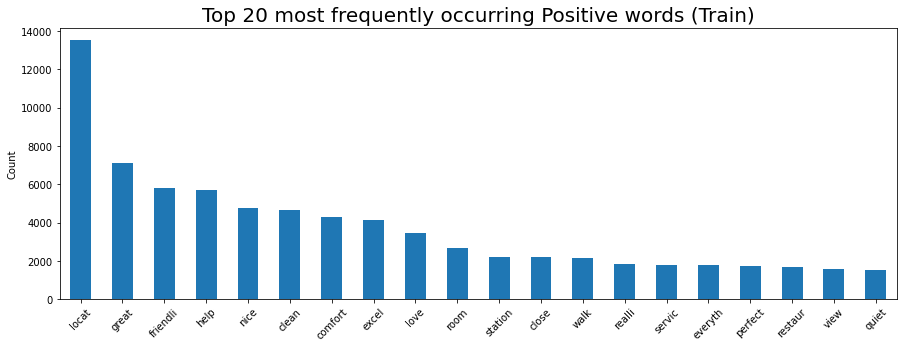

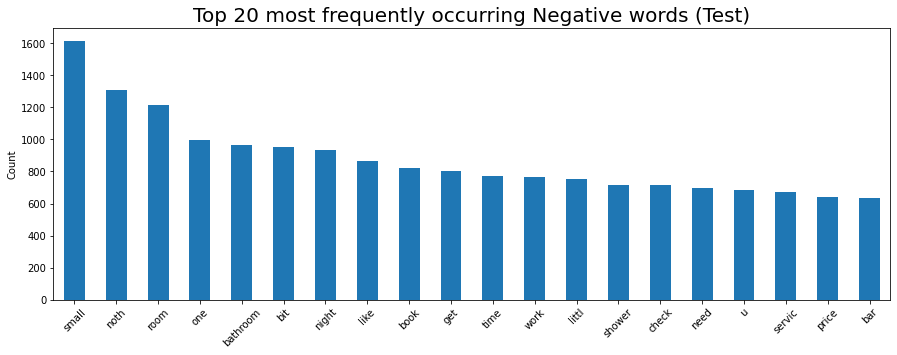

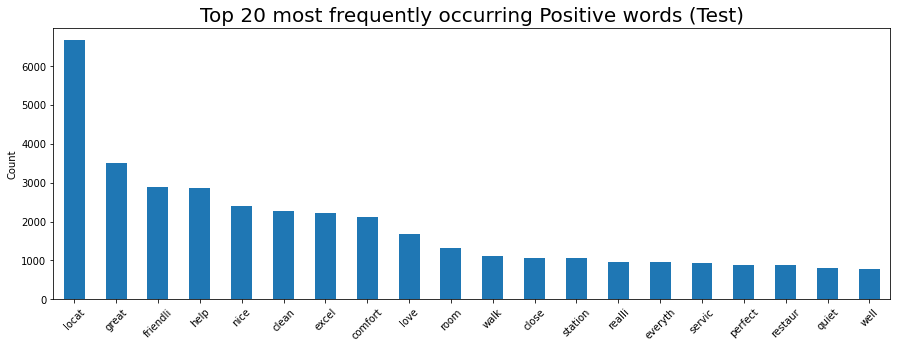

In [208]:
# Plot 
train_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Train)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

train_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Train)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

test_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Test)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

test_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Test)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Even when I use a stopword for 'room' and 'bar', it is still appear there, I am not sure what is going on. However, other words are working.
Setting parameters `tokenizer=my_tokenize2` and `min_df=5`:
- X_train['Negative_Review'] has 3141 columns and the top 5 words are: 'small', 'noth', 'room', 'one', and 'night'.
- X_train['Positive_Review'] has 2542 columns and the top 5 words are: 'locat', 'great', 'friendli', 'help' and 'nice'.
- X_test['Negative_Review'] has 2247 columns and the top 5 words are: 'small', 'noth', 'room', 'one', and 'bathroom'.
- X_test['Positive_Review'] has 1841 columns and the top 5 words are: 'locat', 'great', 'friendli', 'help' and 'nice'.

The columns are way reduced than before this must be because of the use of parameter `min_df` on top of the `tokenizer`. The top 20 words between the positive and negative looks different. <br /> <p>
Below, I am using additional `max_df=0.95`.

In [297]:
# 1. Instantiate bag of words
# for X_train['negative review']
bow1 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5, max_df=0.95)    
# for X_train['positive review']
bow2 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5, max_df=0.95)    
# for X_test['negative review']
bow3 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5, max_df=0.95) 
# for X_test['positive review']
bow4 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5, max_df=0.95) 

# 2. Fit & Transform
train_neg = bow1.fit_transform(X_train['Negative_Review'])
train_pos = bow2.fit_transform(X_train['Positive_Review'])
test_neg = bow3.fit_transform(X_test['Negative_Review'])
test_pos = bow4.fit_transform(X_test['Positive_Review'])

In [298]:
# Checking the shape 
train_neg  

<34519x3141 sparse matrix of type '<class 'numpy.int64'>'
	with 240243 stored elements in Compressed Sparse Row format>

In [213]:
train_pos

<34519x2542 sparse matrix of type '<class 'numpy.int64'>'
	with 254249 stored elements in Compressed Sparse Row format>

In [214]:
test_neg

<17002x2247 sparse matrix of type '<class 'numpy.int64'>'
	with 114010 stored elements in Compressed Sparse Row format>

In [215]:
test_pos

<17002x1841 sparse matrix of type '<class 'numpy.int64'>'
	with 123727 stored elements in Compressed Sparse Row format>

In [299]:
train_neg_wordcount = pd.DataFrame(
    {'counts' : train_neg.toarray().sum(axis=0)},
    index=bow1.get_feature_names_out()
)

train_pos_wordcount = pd.DataFrame(
    {'counts' : train_pos.toarray().sum(axis=0)},
    index=bow2.get_feature_names_out()
)

test_neg_wordcount = pd.DataFrame(
    {'counts' : test_neg.toarray().sum(axis=0)},
    index=bow3.get_feature_names_out()
)

test_pos_wordcount = pd.DataFrame(
    {'counts' : test_pos.toarray().sum(axis=0)},
    index=bow4.get_feature_names_out()
)

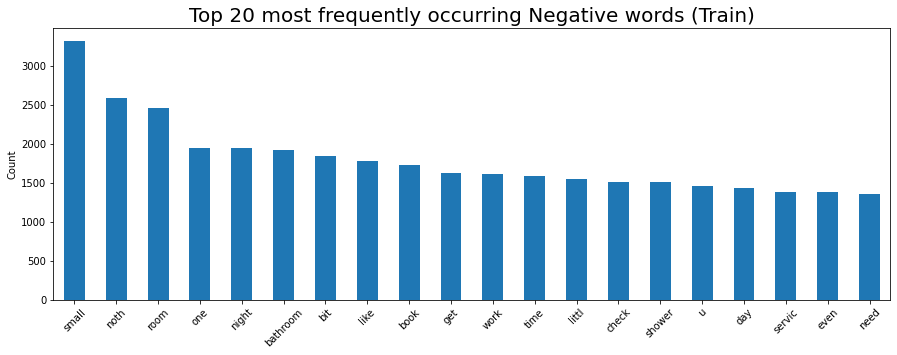

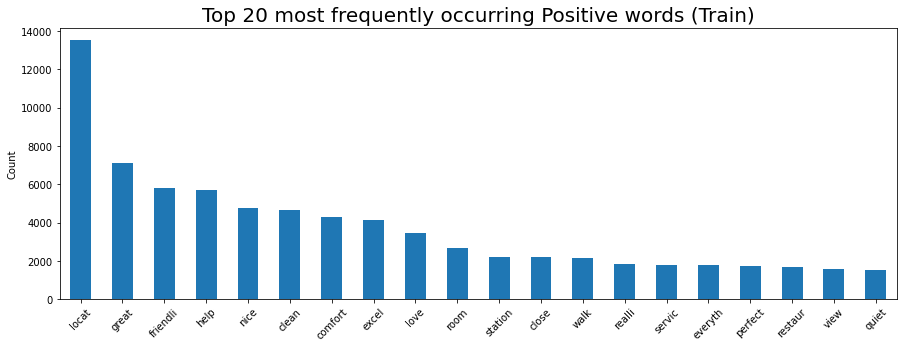

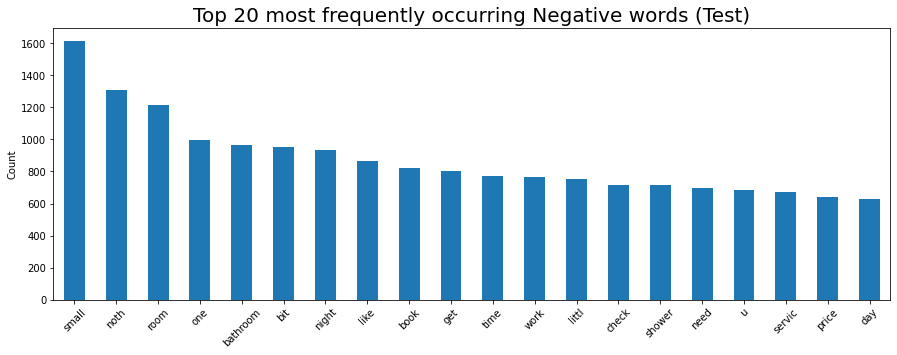

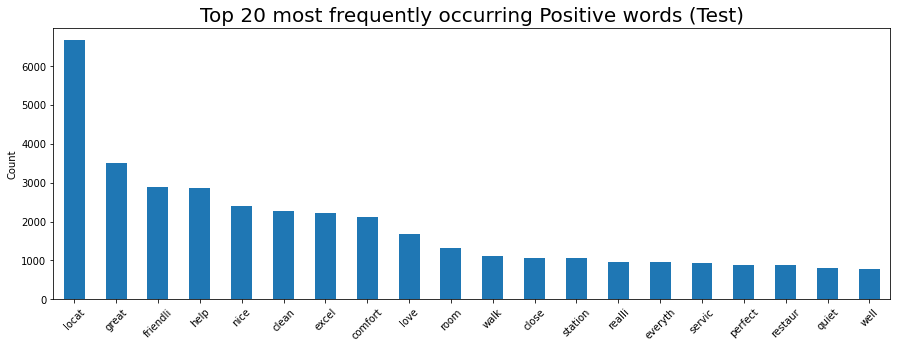

In [300]:
# Plot 
train_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Train)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

train_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Train)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

test_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Test)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

test_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Test)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

When using max_df, the columns stay the same, and majority of the words are the same.

In [216]:
# 1. Instantiate bag of words
# for X_train['negative review']
bow1 = CountVectorizer(tokenizer=my_tokenizer2, min_df=10, max_df=0.95)    
# for X_train['positive review']
bow2 = CountVectorizer(tokenizer=my_tokenizer2, min_df=10, max_df=0.95)    
# for X_test['negative review']
bow3 = CountVectorizer(tokenizer=my_tokenizer2, min_df=10, max_df=0.95) 
# for X_test['positive review']
bow4 = CountVectorizer(tokenizer=my_tokenizer2, min_df=10, max_df=0.95) 

# 2. Fit & Transform
train_neg = bow1.fit_transform(X_train['Negative_Review'])
train_pos = bow2.fit_transform(X_train['Positive_Review'])
test_neg = bow3.fit_transform(X_test['Negative_Review'])
test_pos = bow4.fit_transform(X_test['Positive_Review'])

In [217]:
# Checking the shape 
train_neg 

<34519x2191 sparse matrix of type '<class 'numpy.int64'>'
	with 233936 stored elements in Compressed Sparse Row format>

In [218]:
train_pos

<34519x1766 sparse matrix of type '<class 'numpy.int64'>'
	with 249102 stored elements in Compressed Sparse Row format>

In [219]:
test_neg

<17002x1518 sparse matrix of type '<class 'numpy.int64'>'
	with 109242 stored elements in Compressed Sparse Row format>

In [220]:
test_pos

<17002x1250 sparse matrix of type '<class 'numpy.int64'>'
	with 119870 stored elements in Compressed Sparse Row format>

In [221]:
train_neg_wordcount = pd.DataFrame(
    {'counts' : train_neg.toarray().sum(axis=0)},
    index=bow1.get_feature_names_out()
)

train_pos_wordcount = pd.DataFrame(
    {'counts' : train_pos.toarray().sum(axis=0)},
    index=bow2.get_feature_names_out()
)

test_neg_wordcount = pd.DataFrame(
    {'counts' : test_neg.toarray().sum(axis=0)},
    index=bow3.get_feature_names_out()
)

test_pos_wordcount = pd.DataFrame(
    {'counts' : test_pos.toarray().sum(axis=0)},
    index=bow4.get_feature_names_out()
)

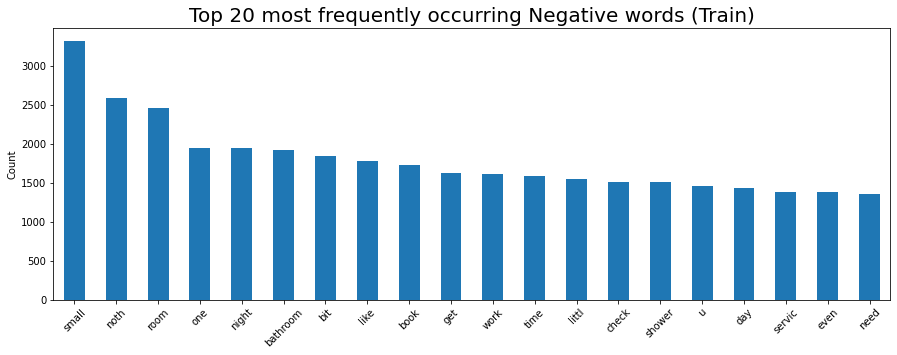

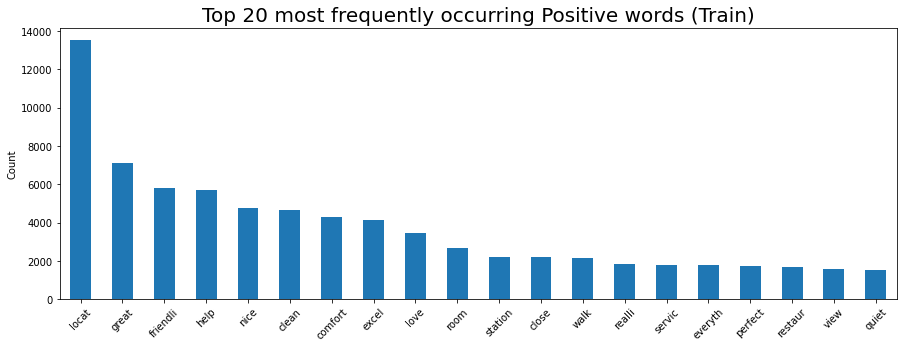

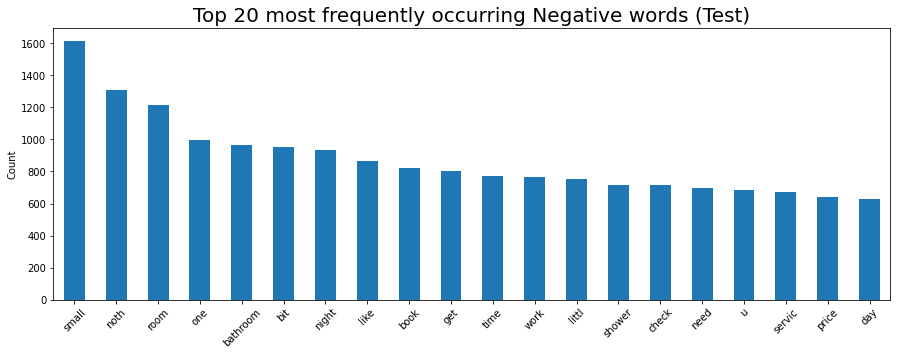

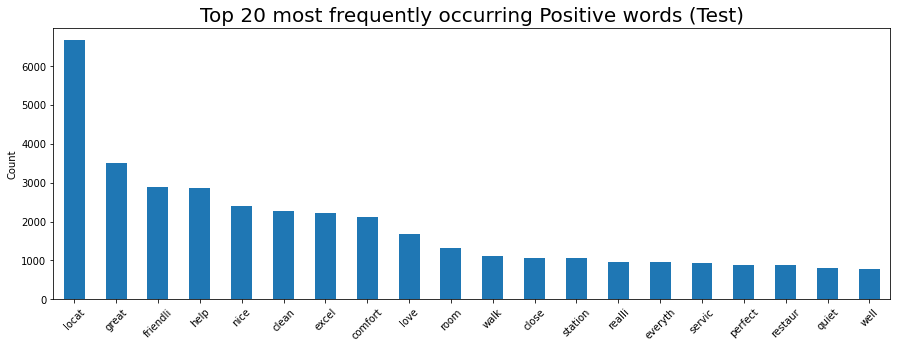

In [222]:
# Plot 
train_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Train)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

train_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Train)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

test_neg_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Negative words (Test)", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

test_pos_wordcount.sort_values('counts', ascending=False).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring Positive words (Test)", size = 20)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [313]:
# Checking how many similar words between train negtive and train positive:
similar_word = []
for word in bow1.get_feature_names_out():
    if word in bow2.get_feature_names_out():
        similar_word.append(word)

similar_word

['abil',
 'abl',
 'absolut',
 'ac',
 'accept',
 'access',
 'accommod',
 'accomod',
 'accord',
 'account',
 'accur',
 'acknowledg',
 'across',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'adapt',
 'add',
 'addit',
 'address',
 'adequ',
 'adjac',
 'adjoin',
 'adjust',
 'adult',
 'advanc',
 'advantag',
 'advertis',
 'advic',
 'advis',
 'aesthet',
 'affect',
 'afford',
 'afternoon',
 'afterward',
 'age',
 'ago',
 'agre',
 'ahead',
 'air',
 'aircon',
 'aircondit',
 'airport',
 'alarm',
 'albeit',
 'alcohol',
 'alloc',
 'allow',
 'almost',
 'alon',
 'along',
 'alot',
 'alreadi',
 'alright',
 'also',
 'altern',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc',
 'amen',
 'american',
 'among',
 'amount',
 'amsterdam',
 'anniversari',
 'annoy',
 'anoth',
 'answer',
 'antiqu',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anyway',
 'anywher',
 'apart',
 'apolog',
 'apologis',
 'app',
 'appar',
 'appeal',
 'appear',
 'appl',
 'applianc',
 'appoint',
 'appreci',
 'approach',
 'appropri',
 '

There are a lot of similar words between positive and negative. I think we can label them with prefixes on the dataframe to make it easier which one is positive and which one is negative. <br /> <p>
Overall, the parameter `min_df` has a big influence in reducing the tokens. The bigger the size of min_df, we will get smaller number of tokens. But the top 20 words stays the same.

Setting max_features to 100 can limit the number of feature or tokens to 100. Depending on the necessity, we can adjust the `min_df`, `max_df` and `max_features`. But for the purposes of this project, I will use `tokenizer=my_tokenizer2`, `min_df=5` and `max_df=0.95` (I used it above, so, I won't do the graph below). I am choosing `min_df=5` so that the tokens are not too small nor too big for evaluation.

In [314]:
# 1. Instantiate bag of words
# for X_train['negative review']
bow1 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5, max_df=0.95)    
# for X_train['positive review']
bow2 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5, max_df=0.95)    
# for X_test['negative review']
bow3 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5, max_df=0.95)
# for X_test['positive review']
bow4 = CountVectorizer(tokenizer=my_tokenizer2, min_df=5, max_df=0.95)

# 2. Fit & Transform
train_neg = bow1.fit_transform(X_train['Negative_Review'])
train_pos = bow2.fit_transform(X_train['Positive_Review'])
test_neg = bow3.fit_transform(X_test['Negative_Review'])
test_pos = bow4.fit_transform(X_test['Positive_Review'])

In [315]:
# Making Dataframe
train_neg_wordcount = pd.DataFrame(
    {'counts' : train_neg.toarray().sum(axis=0)},
    index=bow1.get_feature_names_out()
)

train_pos_wordcount = pd.DataFrame(
    {'counts' : train_pos.toarray().sum(axis=0)},
    index=bow2.get_feature_names_out()
)

test_neg_wordcount = pd.DataFrame(
    {'counts' : test_neg.toarray().sum(axis=0)},
    index=bow3.get_feature_names_out()
)

test_pos_wordcount = pd.DataFrame(
    {'counts' : test_pos.toarray().sum(axis=0)},
    index=bow4.get_feature_names_out()
)

In [322]:
bow1.get_feature_names_out()

array(['abandon', 'abil', 'abit', ..., 'yr', 'zero', 'zone'], dtype=object)

In [318]:
# make prefix
train_neg_prefix = ['train_neg_' + word for word in bow1.get_feature_names_out()]
# make train negative dataframe
train_neg_df = pd.DataFrame(train_neg.toarray(), columns=train_neg_prefix, index = X_train.index)
train_neg_df.head()

,train_neg_abandon,train_neg_abil,train_neg_abit,train_neg_abl,train_neg_abrupt,train_neg_absenc,train_neg_absolut,train_neg_ac,train_neg_acc,train_neg_accept,...,train_neg_yellow,train_neg_yet,train_neg_yo,train_neg_yoghurt,train_neg_yogurt,train_neg_young,train_neg_younger,train_neg_yr,train_neg_zero,train_neg_zone
32578,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
# make prefix
train_pos_prefix = ['train_pos_' + word for word in bow2.get_feature_names_out()]
# make train positive dataframe
train_pos_df = pd.DataFrame(train_pos.toarray(), columns=train_pos_prefix, index = X_train.index)
train_pos_df.head()

,train_pos_abbey,train_pos_abil,train_pos_abl,train_pos_absolut,train_pos_abund,train_pos_ac,train_pos_accept,train_pos_access,train_pos_accommod,train_pos_accomod,...,train_pos_yet,train_pos_yoghurt,train_pos_yogurt,train_pos_young,train_pos_yr,train_pos_yummi,train_pos_ziggo,train_pos_zone,train_pos_zoo,train_pos_zuid
32578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [323]:
# make prefix
test_neg_prefix = ['test_neg_' + word for word in bow3.get_feature_names_out()]
# make negative dataframe
test_neg_df = pd.DataFrame(test_neg.toarray(), columns=test_neg_prefix, index = X_test.index)
test_neg_df.head()

,test_neg_abit,test_neg_abl,test_neg_abrupt,test_neg_abruptli,test_neg_absenc,test_neg_absolut,test_neg_ac,test_neg_accept,test_neg_access,test_neg_accid,...,test_neg_yard,test_neg_ye,test_neg_year,test_neg_yell,test_neg_yesterday,test_neg_yet,test_neg_yoghurt,test_neg_young,test_neg_younger,test_neg_zero
2648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [324]:
# make prefix
test_pos_prefix = ['test_pos_' + word for word in bow4.get_feature_names_out()]
# make test positive dataframe
test_pos_df = pd.DataFrame(test_pos.toarray(), columns=test_pos_prefix, index = X_test.index)
test_pos_df.head()

,test_pos_abbey,test_pos_abil,test_pos_abl,test_pos_absolut,test_pos_ac,test_pos_accept,test_pos_access,test_pos_accessori,test_pos_accommod,test_pos_accomod,...,test_pos_yard,test_pos_ye,test_pos_year,test_pos_yet,test_pos_yoghurt,test_pos_yogurt,test_pos_young,test_pos_yr,test_pos_yummi,test_pos_zone
2648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
# testing
test_pos_df['test_pos_locat']

2648     1
39755    1
38461    0
35490    1
31092    0
        ..
24012    0
38327    0
47696    0
27840    0
5769     1
Name: test_pos_locat, Length: 17002, dtype: int64

In [326]:
# dropping the original Negative Review and Positive review
X_train = X_train.drop(['Negative_Review', 'Positive_Review'], axis=1)
X_train

,Additional_Number_of_Scoring,Review_Date,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng
32578,832,2016,8.9,10,2924,3,1,392,51.561127,-0.278726
37588,101,2016,8.5,42,1405,15,12,240,48.226406,16.360063
46910,634,2016,7.9,0,4065,2,14,324,51.516288,-0.172108
27479,391,2015,8.8,15,4887,8,12,714,41.373246,2.147435
23955,67,2016,9.1,4,454,10,3,404,48.848192,2.349032
...,...,...,...,...,...,...,...,...,...,...
50057,411,2016,8.9,41,1738,14,1,476,51.518021,-0.150057
32511,237,2017,8.4,13,2179,22,1,30,52.310118,4.947292
5192,391,2016,8.6,2,2685,31,1,394,51.490105,-0.138135
12172,520,2017,7.8,21,2591,4,3,3,52.366347,4.898576


In [327]:
# shape
X_train.shape

(34519, 10)

In [329]:
# Concat numeric data(X_train) with train_neg_df and train_pos_df
X_train_new = pd.concat([X_train, train_neg_df, train_pos_df], axis=1)
X_train_new.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,...,train_pos_yet,train_pos_yoghurt,train_pos_yogurt,train_pos_young,train_pos_yr,train_pos_yummi,train_pos_ziggo,train_pos_zone,train_pos_zoo,train_pos_zuid
32578,832,2016,8.9,10,2924,3,1,392,51.561127,-0.278726,...,0,0,0,0,0,0,0,0,0,0
37588,101,2016,8.5,42,1405,15,12,240,48.226406,16.360063,...,0,0,0,0,0,0,0,0,0,0
46910,634,2016,7.9,0,4065,2,14,324,51.516288,-0.172108,...,0,0,0,0,0,0,0,0,0,0
27479,391,2015,8.8,15,4887,8,12,714,41.373246,2.147435,...,0,0,0,0,0,0,0,0,0,0
23955,67,2016,9.1,4,454,10,3,404,48.848192,2.349032,...,0,0,0,0,0,0,0,0,0,0


In [330]:
print(f'There are {X_train_new.shape[0]} rows and {X_train_new.shape[1]} columns.')

There are 34519 rows and 5693 columns.


In [331]:
# Concat numeric data(X_train) with train_neg_df and train_pos_df
X_test_new = pd.concat([X_test, test_neg_df, test_pos_df], axis=1)
X_test_new.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,...,test_pos_yard,test_pos_ye,test_pos_year,test_pos_yet,test_pos_yoghurt,test_pos_yogurt,test_pos_young,test_pos_yr,test_pos_yummi,test_pos_zone
2648,545,2015,8.0,Rooms really small,5,2907,Location,2,12,633,...,0,0,0,0,0,0,0,0,0,0
39755,1444,2016,7.8,Frigid bar empty Amenities weren t complete,8,5726,Hotel Location and lobby,6,6,544,...,0,0,0,0,0,0,0,0,0,0
38461,341,2017,8.2,No Negative,0,1496,This hotel was not like any other London hote...,31,2,142,...,0,0,0,0,0,0,0,0,0,0
35490,119,2017,9.2,No Negative,0,704,We had a very enjoyable and comfortable 3 nig...,87,14,185,...,0,0,0,1,0,0,0,0,0,0
31092,555,2015,8.4,Overall a lovely hotel however there was a me...,44,4410,No Positive,0,1,710,...,0,0,0,0,0,0,0,0,0,0


In [332]:
print(f'There are {X_test_new.shape[0]} rows and {X_test_new.shape[1]} columns.')

There are 17002 rows and 4100 columns.


## Conclusion
The hotel review is about various reviews and scores gotten from the customers about the hotels that they stayed. The hotels located in 6 Europe's countries: United Kingdom, Spain, France, Netherlands, Austria and Italy. Half of the hotels were located in the United Kingdom. Most reviewers were British. Brittania International Hotel Canary Wharf was the hotel with the most visitors. Most visitors stayed at the hotel were taking a leisure trip. 
<br /><p>
More than half of the visitors gave a high rating of reviewer score and the distribution of reviewer score had a left skewed distribution. It could be a potential problem for classification problem since there would be bias toward the class with the bigger dataset. However, after changing it into binary columns, the class imbalance was getting better.
<br /><p>
Year 2016 was the year where most reviews received, while summer season and summer break in July and August was the peak where visitors would come. The average score was around 8. 
<br /><p>
When observing the positive and negative reviews, the parameter `min_df` can reduce the number of features by ignoring the words that appear less than certain value. For example: by using `min_df = 5`, the words that occur less than 5 times in the documents would not be counted. We can also used percentage as in `min_df = 0.01`, which means the words that occur less than 1% in the documents would not be counted.
<br /><p>
The top 5 negative word counts are: 'small', 'noth', 'room', 'one', and 'night'. Top 5 positive word counts are: 'locat', 'great', 'friendli', 'help', and 'nice'